In [2]:
from pathlib import Path
from fastparquet import ParquetFile
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
shard = "_shards_2"

In [4]:
parquet_file = ParquetFile(f"/home/leobaro/Downloads/datasets/web/datacomp/{shard}/00000000.parquet")
print(parquet_file.columns)

['uid', 'face_bboxes', 'caption', 'url', 'key', 'status', 'error_message', 'width', 'height', 'original_width', 'original_height', 'exif', 'sha256']


# Loading all metadata files

In [5]:
path = Path(f"/home/leobaro/Downloads/datasets/web/datacomp/all_metadata_backup")

In [6]:
parquet_files = list(path.glob("*.parquet"))
columns_to_load = ['clip_b32_similarity_score', 'clip_l14_similarity_score']
data_frames = []
for file in parquet_files:
    parquet_file = ParquetFile(file)
    df = parquet_file.to_pandas(columns=columns_to_load)
    data_frames.append(df)
df = pd.concat(data_frames, ignore_index=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5587065 entries, 0 to 5587064
Data columns (total 2 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   clip_b32_similarity_score  float32
 1   clip_l14_similarity_score  float32
dtypes: float32(2)
memory usage: 42.6 MB
None


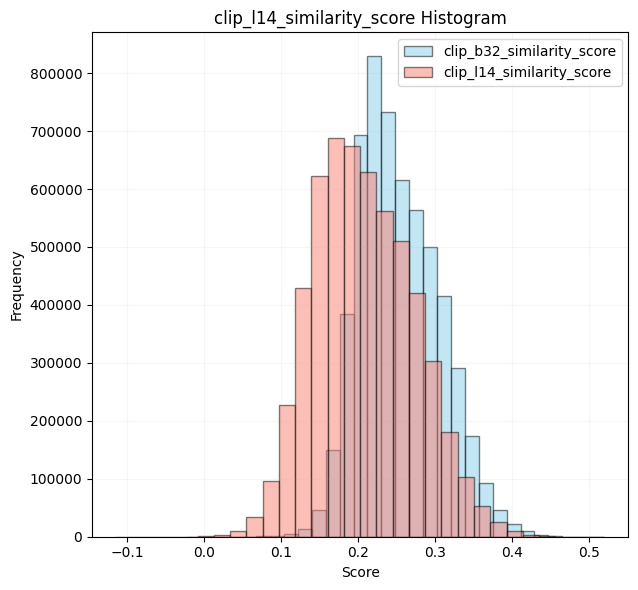

In [7]:
plt.figure(figsize=(12, 6))

# Histogram for clip_b32_similarity_score
plt.subplot(1, 2, 1)
df['clip_b32_similarity_score'].hist(
    bins=30, color='skyblue', 
    edgecolor='black', alpha=0.5, label="clip_b32_similarity_score"
)
plt.title('clip_b32_similarity_score Histogram')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for clip_l14_similarity_score
df['clip_l14_similarity_score'].hist(
    bins=30, color='salmon', edgecolor='black', alpha=0.5, label="clip_l14_similarity_score"
)
plt.title('clip_l14_similarity_score Histogram')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.grid(alpha=0.1)
plt.legend()
# Show the plots
plt.tight_layout()
plt.show()

# Loading shards

In [8]:
import webdataset as wds
from itertools import islice

In [9]:
shard = Path("_shards_2")
shards_path = Path(f"/home/leobaro/Downloads/datasets/web/datacomp/{shard}")

In [10]:
tar_files = sorted([str(shards_path/s) for s in shards_path.glob("*.tar")])

In [11]:
tar_files[0:10]

['/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000000.tar',
 '/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000001.tar',
 '/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000002.tar',
 '/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000003.tar',
 '/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000004.tar',
 '/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000005.tar',
 '/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000006.tar',
 '/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000007.tar',
 '/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000008.tar',
 '/home/leobaro/Downloads/datasets/web/datacomp/_shards_2/00000009.tar']

In [12]:
dataset = wds.WebDataset(tar_files)

/home/leobaro/workspace/labs/fair_spoke_8/datacomp_download/.venv/lib/python3.10/site-packages/webdataset/compat.py:379: UserWarning: WebDataset(shardshuffle=...) is None; set explicitly to False or a number
  warnings.warn("WebDataset(shardshuffle=...) is None; set explicitly to False or a number")


In [13]:
dataset

In [14]:
def jpg_decoder(value):
    return Image.fromarray(imageio.imread(io.BytesIO(value)))
    
def uid_decoder(value):
    return json.loads(value["json"].decode("utf-8")).get("uid", "unknown")

def caption_decoder(value):
    return value["txt"].decode("utf-8").strip()
    
decoder = wds.Decoder([
    wds.handle_extension(".jpg",  jpg_decoder),
    wds.handle_extension(".json", uid_decoder),
    wds.handle_extension(".txt",  caption_decoder)
])

In [15]:
#pil_dataset = dataset.decode("pil").to_tuple("jpg", "json", "txt")

In [18]:
from PIL import Image
import imageio.v2 as imageio
import io
import json
dataset = (
    wds.WebDataset(tar_files)
    .decode(
        wds.handle_extension(".jpg", lambda value: Image.fromarray(imageio.imread(io.BytesIO(value)))),
        wds.handle_extension(".json", lambda value: json.loads(value.decode("utf-8")).get("uid", "unknown")),
        wds.handle_extension(".txt", lambda value: value.decode("utf-8").strip()),
    )
    .to_tuple("jpg", "json", "txt")  # Extract image, uid, and caption
    .batched(16)
)

In [25]:
batch = next(iter(dataset))
images, uids, captions = batch
print(len(images), len(uids), len(captions))

16 16 16


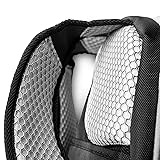

NHL Nashville Predators Colored Trim Premium Laptop Backpack


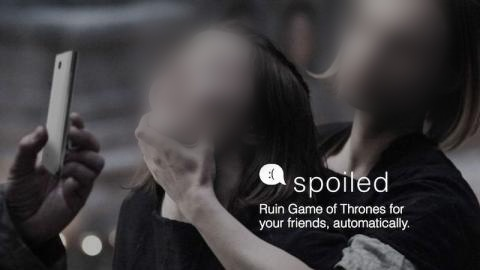

This App Will Send Game Of Thrones Spoilers To Your Enemies


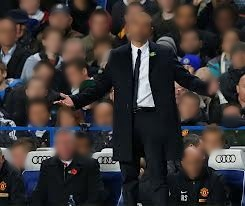

Chelsea


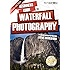

Beginners Guide to Waterfall Photography (Beginners Guide to Photography Book 7)


Banner Aniversario -  Vamos todos a unirnos en este año :D - Página 4 MdZMPiH


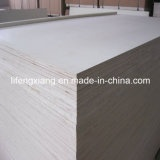

Contre-plaqué de peuplier de la Chine pour l&#039;emballage


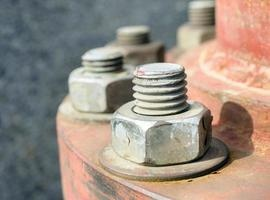

Rusty nut and bolt photo


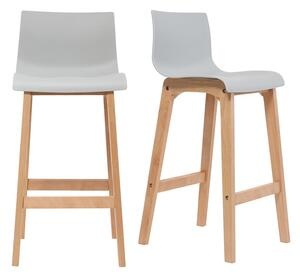

Sgabello da bar design legno e grigio chiaro 65cm set di 2 NEW SURF


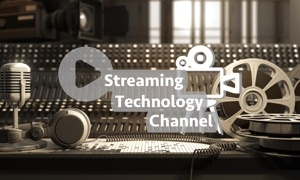

The Streaming Technology Channel


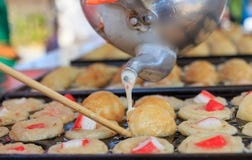

Takoyaki immagini stock libere da diritti


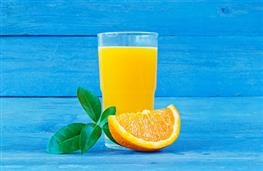

80ml/juice of 1 orange nutritional information


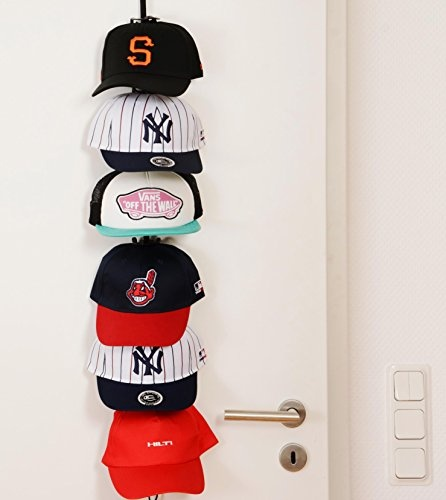

Imagen de soporte para  planas, mantiene el orden, para 18 hasta 36  de béisbol según modelo, 3 schwarz 12 clips


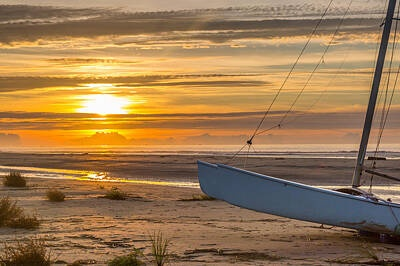

Sullivan's Island Sunrise Poster


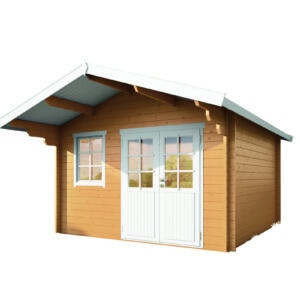

WOLFF FINNHAUS Gartenhaus Lisa 44-C in Fichte 360x360cm


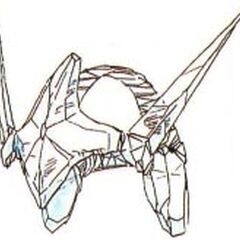

Opal.


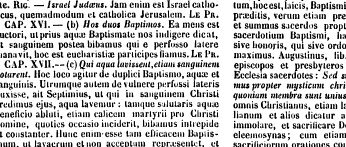

[merged small][ocr errors][ocr errors][ocr errors][merged small][merged small]


In [29]:
for i,u,c in zip(images, uids, captions):
    display(i)
    print(c)